# Housing Price Predictions Project

In [188]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
df=pd.read_csv('housing_train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

# Description:
# Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
# we need to predict house prices

In [136]:
print('the numer of rows and columns in the data: ',df.shape)

the numer of rows and columns in the data:  (1168, 81)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# we can see that the data contains categorical data as well as non-categorical data

In [138]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [139]:
df.head(7)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  

[7 rows x 81 columns]

# there are also some nan values present in the columns so we need to replace the nan values with mean for non categorical and by mode for categorical.

In [140]:
#filling the nan values for non-categorical
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [141]:
#filling the nan values for categorical data
lis=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in lis:
    df[i]=df[i].fillna(df[i].mode().iloc[0])

In [142]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL     70.98847     4928   Pave  Grvl      IR1   
1  889          20       RL     95.00000    15865   Pave  Grvl      IR1   
2  793          60       RL     92.00000     9920   Pave  Grvl      IR1   
3  110          20       RL    105.00000    11751   Pave  Grvl      IR1   
4  422          20       RL     70.98847    16635   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# we have cleared all the nan values

# we can drop ID column as it only gives the identity to the specific data 

In [144]:
df=df.drop(['Id'],axis=1)

In [145]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL     70.98847     4928   Pave  Grvl      IR1   
1             20       RL     95.00000    15865   Pave  Grvl      IR1   
2             60       RL     92.00000     9920   Pave  Grvl      IR1   
3             20       RL    105.00000    11751   Pave  Grvl      IR1   
4             20       RL     70.98847    16635   Pave  Grvl      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1163          20       RL     70.98847     9819   Pave  Grvl      IR1   
1164          20       RL     67.00000     8777   Pave  Grvl      Reg   
1165         160       RL     24.00000     2280   Pave  Grvl      Reg   
1166          70  C (all)     50.00000     8500   Pave  Pave      Reg   
1167          60       RL     70.98847     7861   Pave  Grvl      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1            Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
2            Lvl    AllPub   CulDSac  ...        0     Gd  MnPrv        Shed   
3            Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
4            Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1163         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1164         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1165         Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   
1166         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1167         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2007        WD         Normal     128000  
1          0     10    2007        WD         Normal     268000  
2          0      6    2007        WD         Normal     269790  
3          0      1    2010       COD         Normal     190000  
4          0      6    2009        WD         Normal     215000  
...      ...    ...     ...       ...            ...        ...  
1163       0      2    2010        WD         Normal     122000  
1164       0      5    2009        WD         Normal     108000  
1165       0      7    2009        WD         Normal     148500  
1166       0      7    2008        WD         Normal      40000  
1167       0      6    2006        WD         Normal     183200  

[1168 rows x 80 columns]

# EDA AND VISUALIZATION

<AxesSubplot:xlabel='LotShape', ylabel='count'>

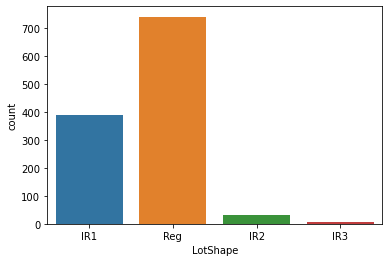

In [146]:
sns.countplot(df['LotShape'])

# reg has the highest counts in lotshape

<AxesSubplot:xlabel='LandContour', ylabel='count'>

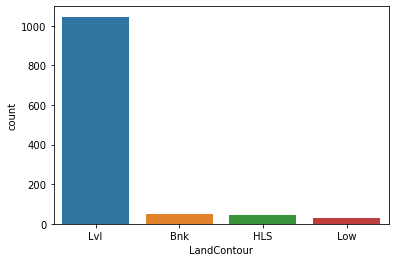

In [147]:
sns.countplot(df['LandContour'])

# checking value counts

In [148]:
# object type data countplots
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Grvl    1132
Pave      36
Name: Alley, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
AllPub    1168
Name: Utilities, dtype: int64
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1005

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

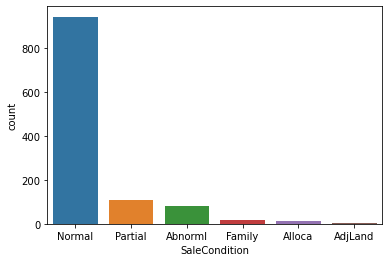

In [149]:
sns.countplot(df['SaleCondition'])

# encoding the data

In [150]:
#converting all the object type data into numerical so that is will help us in buliding models
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [151]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0            120         3     70.98847     4928       1      0         0   
1             20         3     95.00000    15865       1      0         0   
2             60         3     92.00000     9920       1      0         0   
3             20         3    105.00000    11751       1      0         0   
4             20         3     70.98847    16635       1      0         0   
...          ...       ...          ...      ...     ...    ...       ...   
1163          20         3     70.98847     9819       1      0         0   
1164          20         3     67.00000     8777       1      0         3   
1165         160         3     24.00000     2280       1      0         3   
1166          70         0     50.00000     8500       1      1         3   
1167          60         3     70.98847     7861       1      0         0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       2      2   
1               3          0          4  ...         0       2      2   
2               3          0          1  ...         0       2      2   
3               3          0          4  ...         0       2      2   
4               3          0          2  ...         0       2      2   
...           ...        ...        ...  ...       ...     ...    ...   
1163            3          0          4  ...         0       2      2   
1164            3          0          4  ...         0       2      2   
1165            3          0          2  ...         0       2      2   
1166            3          0          4  ...         0       2      2   
1167            3          0          4  ...         0       2      2   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               2        0       2    2007         8              4     128000  
1               2        0      10    2007         8              4     268000  
2               2        0       6    2007         8              4     269790  
3               2        0       1    2010         0              4     190000  
4               2        0       6    2009         8              4     215000  
...           ...      ...     ...     ...       ...            ...        ...  
1163            2        0       2    2010         8              4     122000  
1164            2        0       5    2009         8              4     108000  
1165            2        0       7    2009         8              4     148500  
1166            2        0       7    2008         8              4      40000  
1167            2        0       6    2006         8              4     183200  

[1168 rows x 80 columns]

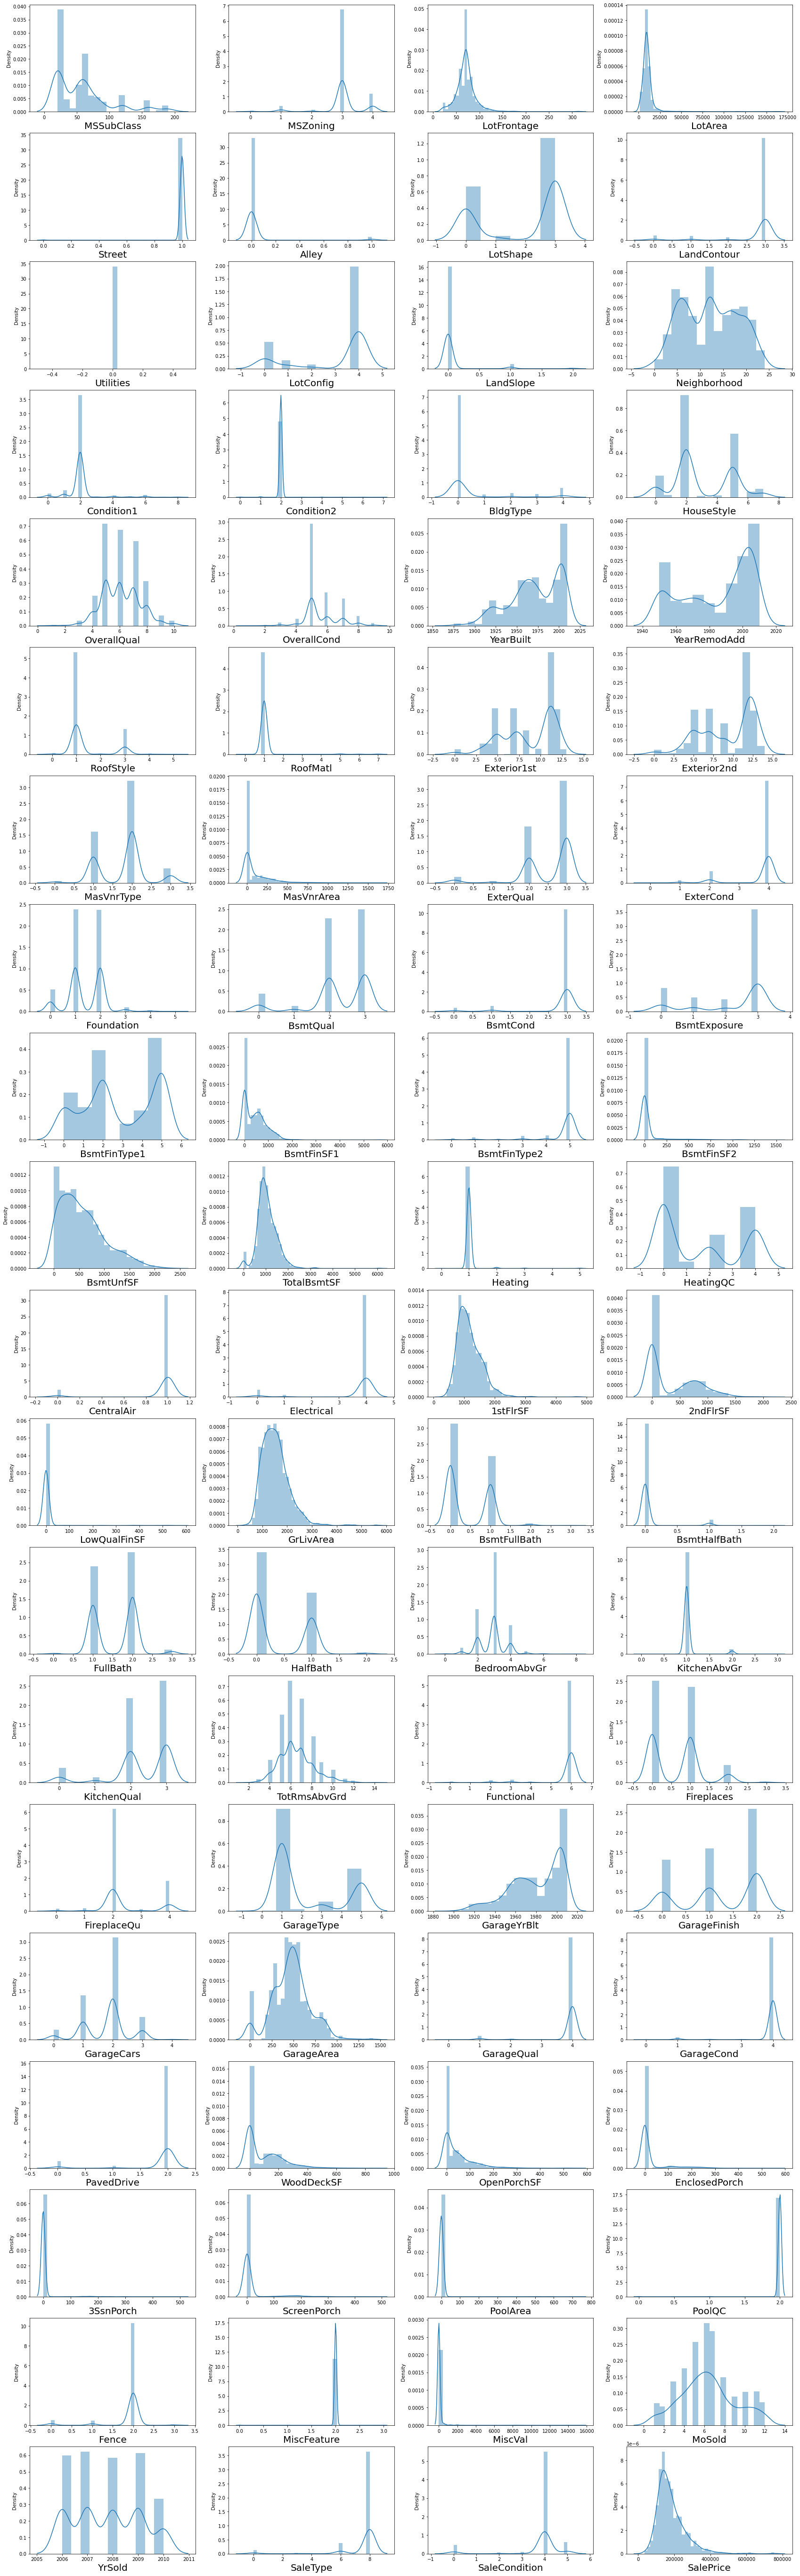

In [152]:
plt.figure(figsize=(29,200))
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(40,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# observations:

# columns having normal distribution are :-
# LotFrontage, Alley, LandContour, Condition1, Conditional2, BldgType, RoofMatl, MasVnrArea, BsmtCond, BsmtFinType2, BsmtFinSF2, LotArea, BsmtUnfSF, TotalBsmtSF, Heating, CentralAir, Electrical, 1stFlrSF, LowQualFinSF, GrLivArea, KitchenAbvGr, Functional, 

# GarageYrBlt, Street, GarageQual, GarageCond, PavedDrive, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, SaleType, SalePrice

# rest all have bimodal type distribution plot

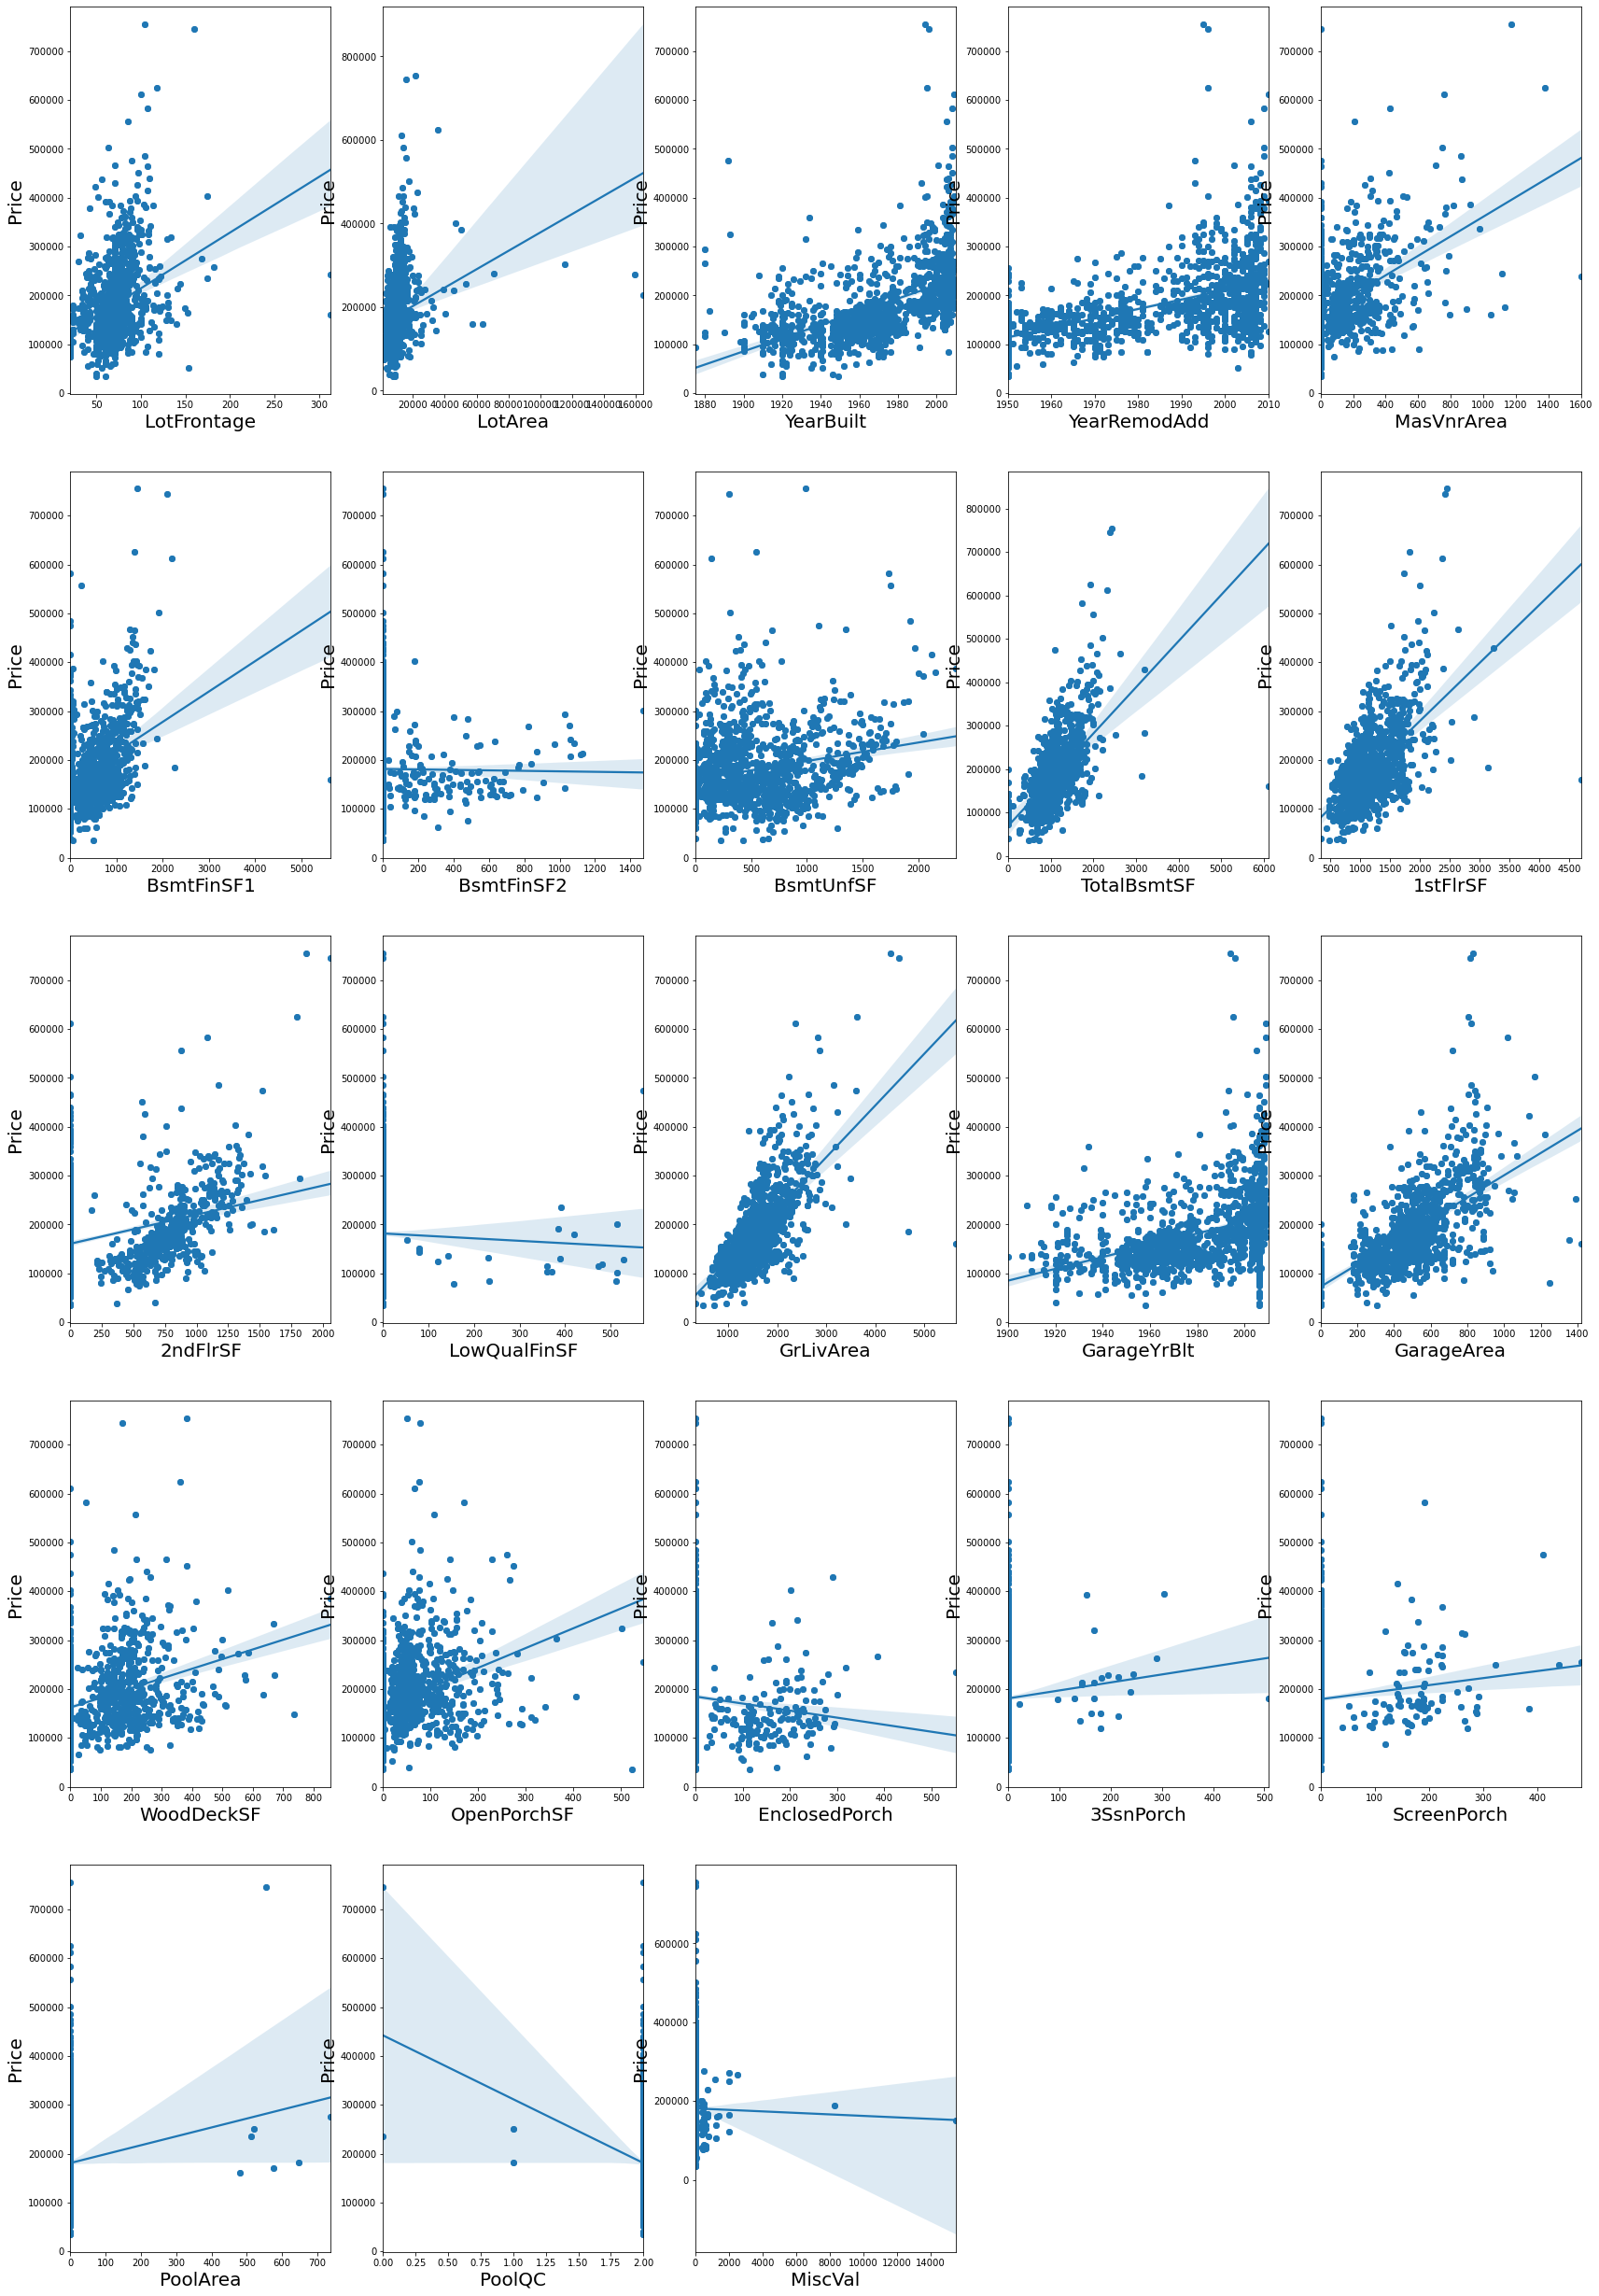

In [153]:
#plotting scatter plot of all non-cqategorical data
lis=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']
plt.figure(figsize=(29,90))
plotnumber=1
for i in lis:
    if plotnumber<=len(lis):
        ax=plt.subplot(10,5,plotnumber)
        sns.regplot(df[i],df['SalePrice'])
        plt.scatter(df[i],df['SalePrice'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.show()

# observations:
Column OpenporchSF, WoodDeckSF, GarageArea, GarageYrBuilt, GrlivArea, 1stflrsf, 2ndflrsf, totalbsmtsf, YearremodAdd, Yearbuilt , lotfrontage,lotarea, masvnrarea, bsmntfinsf1 have positive correlation with column salesprice as we can see in the graphs above

column MiscVal, Enclosedporch have slight negative correlation with sale price

remaining columns dont have correlation with salesprice

# checking for outliers

MSSubClass         AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSZoning         AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
                                       ...                        
MoSold             AxesSubplot(0.421809,0.125;0.0824468x0.0639831)
YrSold             AxesSubplot(0.520745,0.125;0.0824468x0.0639831)
SaleType           AxesSubplot(0.619681,0.125;0.0824468x0.0639831)
SaleCondition      AxesSubplot(0.718617,0.125;0.0824468x0.0639831)
SalePrice          AxesSubplot(0.817553,0.125;0.0824468x0.0639831)
Length: 80, dtype: object

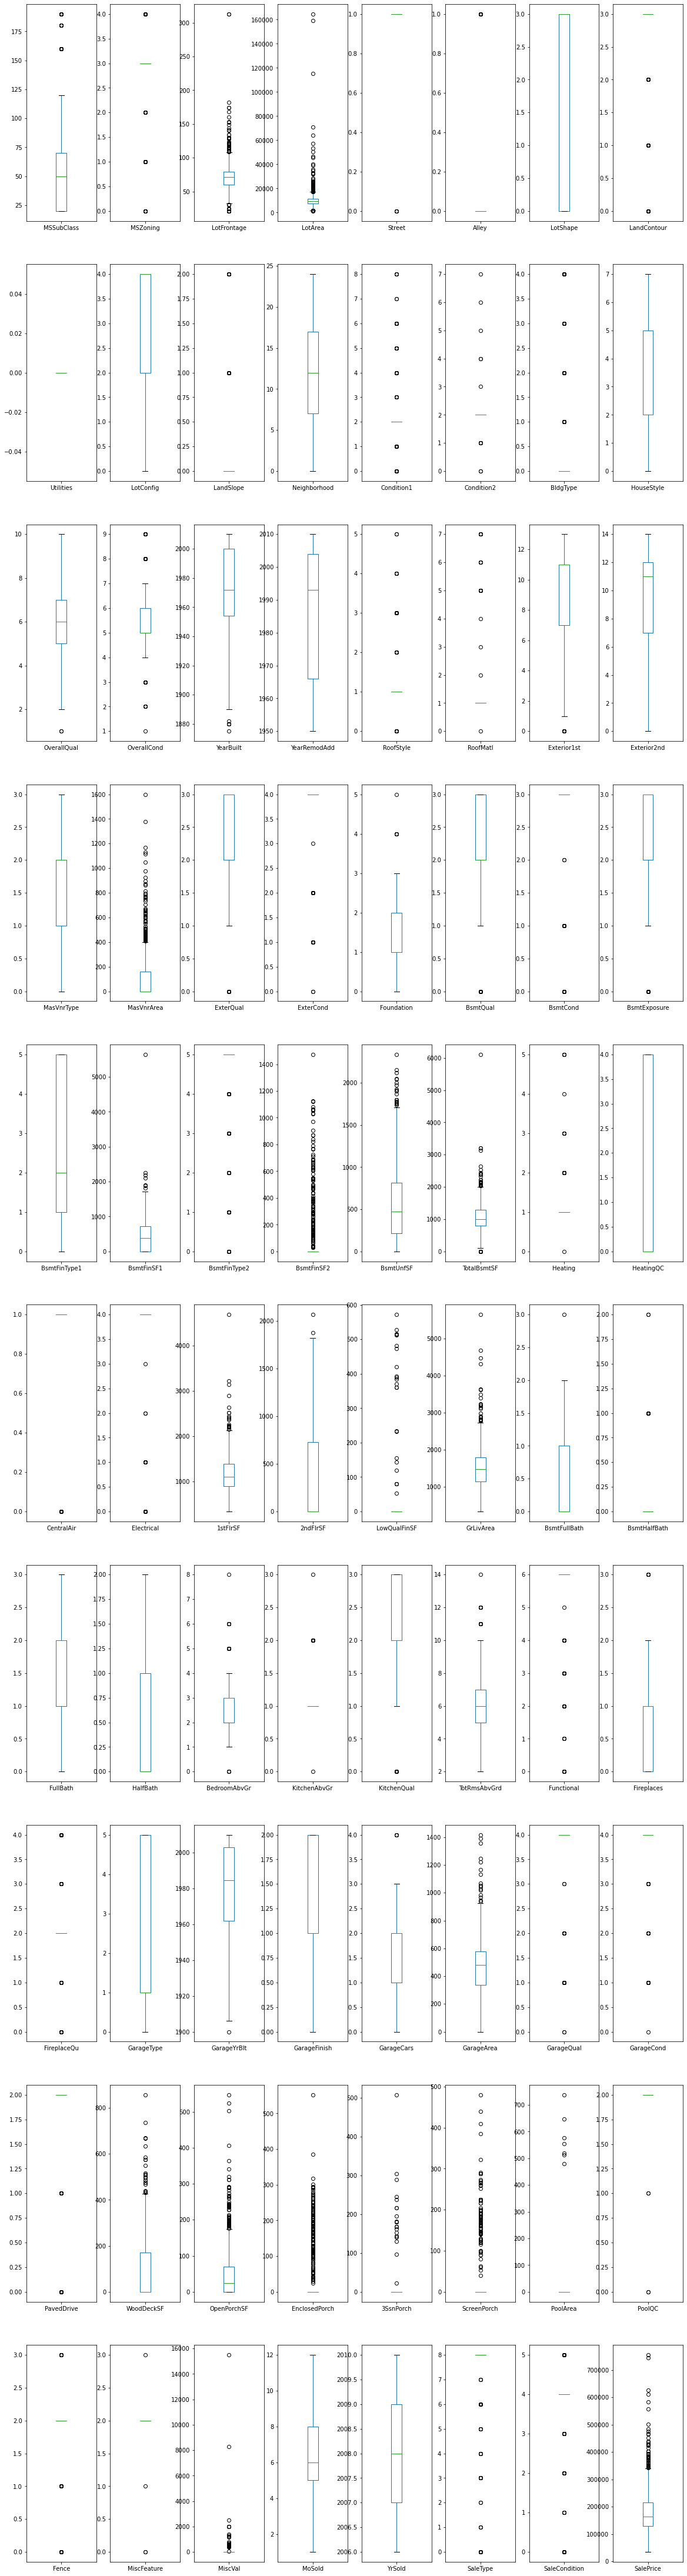

In [154]:
df.plot(kind='box',subplots=True,layout=(10,8),figsize=(20,80))

# we can definitely see some outliers present in the data in almost all the columns we will try to remove the outliers with quantile method as after using zscore sometimes we still see some outliers 

In [155]:
#removing outliers useing quantile method
for i in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    percentile=df[i].quantile([0.01,0.98]).values
    df[i][df[i]<=percentile[0]]=percentile[0]
    df[i][df[i]>=percentile[1]]=percentile[1]

# we have removed the outliers

In [157]:
df.describe()

MSSubClass     MSZoning  LotFrontage       LotArea       Street  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean     56.767979     3.013699    70.256312   9926.818185     0.996575   
std      41.940650     0.633120    18.737269   4224.233428     0.058445   
min      20.000000     0.000000    21.000000   1883.070000     0.000000   
25%      20.000000     3.000000    60.000000   7621.500000     1.000000   
50%      50.000000     3.000000    70.988470   9522.500000     1.000000   
75%      70.000000     3.000000    79.250000  11515.500000     1.000000   
max     190.000000     4.000000   121.660000  25062.700000     1.000000   

             Alley     LotShape  LandContour  Utilities    LotConfig  ...  \
count  1168.000000  1168.000000  1168.000000     1168.0  1168.000000  ...   
mean      0.030822     1.938356     2.773973        0.0     3.004281  ...   
std       0.172909     1.412262     0.710027        0.0     1.642667  ...   
min       0.000000     0.000000     0.000000        0.0     0.000000  ...   
25%       0.000000     0.000000     3.000000        0.0     2.000000  ...   
50%       0.000000     3.000000     3.000000        0.0     4.000000  ...   
75%       0.000000     3.000000     3.000000        0.0     4.000000  ...   
max       1.000000     3.000000     3.000000        0.0     4.000000  ...   

       PoolArea  PoolQC        Fence  MiscFeature      MiscVal       MoSold  \
count    1168.0  1168.0  1168.000000  1168.000000  1168.000000  1168.000000   
mean        0.0     2.0     1.880993     1.996575    16.553082     6.344178   
std         0.0     0.0     0.457685     0.092505    87.025879     2.686352   
min         0.0     2.0     0.000000     0.000000     0.000000     1.000000   
25%         0.0     2.0     2.000000     2.000000     0.000000     5.000000   
50%         0.0     2.0     2.000000     2.000000     0.000000     6.000000   
75%         0.0     2.0     2.000000     2.000000     0.000000     8.000000   
max         0.0     2.0     3.000000     3.000000   500.000000    12.000000   

            YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000    1168.000000    1168.000000  
mean   2007.804795     7.465753       3.768836  181477.005993  
std       1.329738     1.619459       1.112208   79105.586863  
min    2006.000000     0.000000       0.000000   34900.000000  
25%    2007.000000     8.000000       4.000000  130375.000000  
50%    2008.000000     8.000000       4.000000  163995.000000  
75%    2009.000000     8.000000       4.000000  215000.000000  
max    2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 80 columns]

# checking Correlation

In [160]:
df.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.391424 -0.313646 -0.035981   
MSZoning         0.007478  1.000000    -0.084834 -0.045544  0.140215   
LotFrontage     -0.391424 -0.084834     1.000000  0.536880 -0.044573   
LotArea         -0.313646 -0.045544     0.536880  1.000000 -0.082982   
Street          -0.035981  0.140215    -0.044573 -0.082982  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.027718  0.016032 -0.008860   
YrSold          -0.038595 -0.004964    -0.005074 -0.043480 -0.019635   
SaleType         0.035050  0.079854    -0.040647 -0.018826  0.025920   
SaleCondition   -0.028981  0.004501     0.076587  0.040391  0.014176   
SalePrice       -0.060775 -0.133221     0.358470  0.394669  0.044753   

                  Alley  LotShape  LandContour  Utilities  LotConfig  ...  \
MSSubClass     0.216396  0.104485    -0.021387        NaN   0.076880  ...   
MSZoning      -0.371755  0.053655     0.001175        NaN  -0.027246  ...   
LotFrontage   -0.217739 -0.157341    -0.016620        NaN  -0.201691  ...   
LotArea       -0.174148 -0.276290    -0.098944        NaN  -0.195823  ...   
Street         0.010454 -0.012941     0.105226        NaN   0.000153  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.050530 -0.050418    -0.023872        NaN   0.019084  ...   
YrSold        -0.007352  0.021421     0.009499        NaN  -0.009817  ...   
SaleType      -0.002348 -0.015161    -0.041763        NaN  -0.002039  ...   
SaleCondition -0.043124 -0.054905     0.047715        NaN   0.043692  ...   
SalePrice     -0.029798 -0.248171     0.032836        NaN  -0.060452  ...   

               PoolArea  PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
MSSubClass          NaN     NaN  0.043111     0.005979 -0.041830 -0.016015   
MSZoning            NaN     NaN -0.035770     0.000802  0.007359 -0.051646   
LotFrontage         NaN     NaN -0.061222     0.008440  0.005852  0.027718   
LotArea             NaN     NaN -0.041985    -0.041815  0.064465  0.016032   
Street              NaN     NaN -0.015249    -0.002171 -0.166416 -0.008860   
...                 ...     ...       ...          ...       ...       ...   
MoSold              NaN     NaN -0.015444    -0.002149  0.018274  1.000000   
YrSold              NaN     NaN -0.021308     0.001527  0.030449 -0.144536   
SaleType            NaN     NaN -0.003769    -0.012223 -0.008335 -0.063667   
SaleCondition       NaN     NaN  0.045229    -0.007701  0.006740 -0.003462   
SalePrice           NaN     NaN  0.040678     0.018725 -0.055398  0.072764   

                 YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.004964  0.079854       0.004501  -0.133221  
LotFrontage   -0.005074 -0.040647       0.076587   0.358470  
LotArea       -0.043480 -0.018826       0.040391   0.394669  
Street        -0.019635  0.025920       0.014176   0.044753  
...                 ...       ...            ...        ...  
MoSold        -0.144536 -0.063667      -0.003462   0.072764  
YrSold         1.000000  0.013606       0.024505  -0.045508  
SaleType       0.013606  1.000000       0.143557  -0.050851  
SaleCondition  0.024505  0.143557       1.000000   0.217687  
SalePrice     -0.045508 -0.050851       0.217687   1.000000  

[80 rows x 80 columns]

<AxesSubplot:>

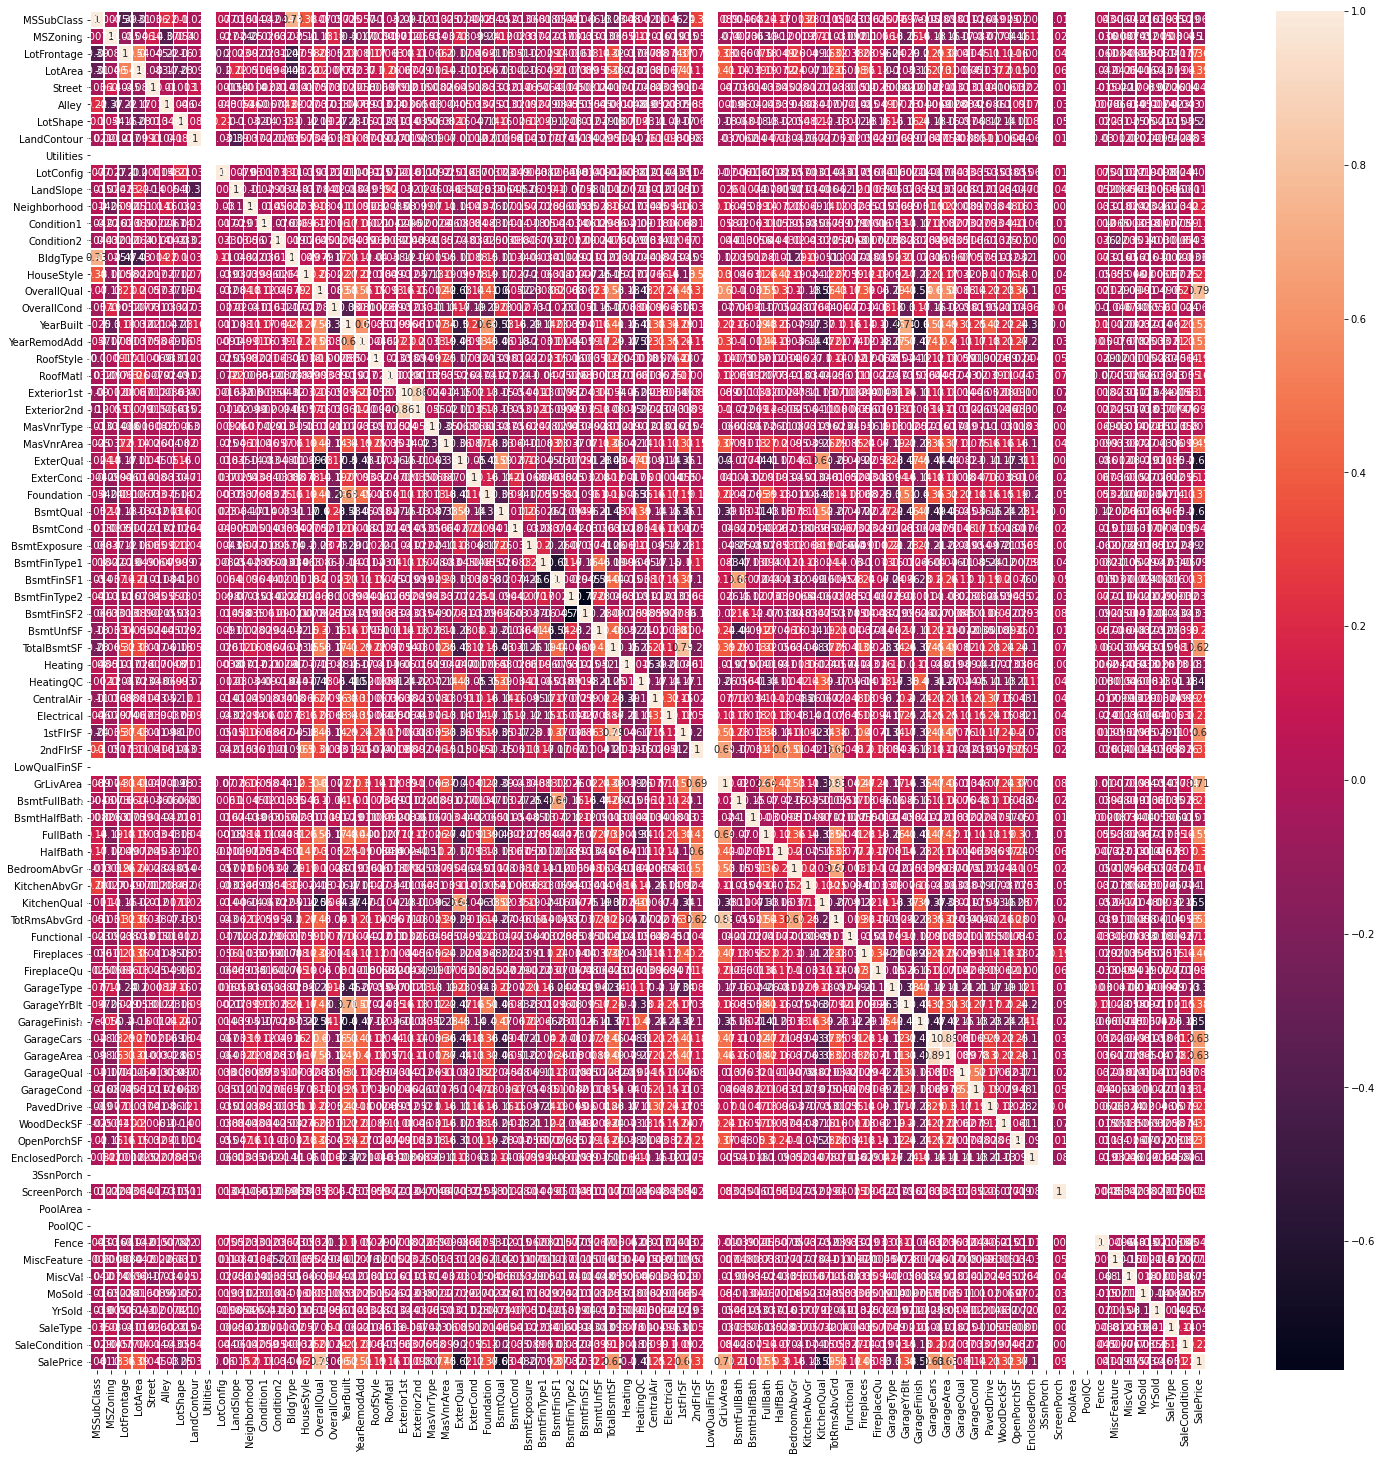

In [167]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# removing skewness

In [178]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [179]:
x.shape

(1168, 79)

In [180]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [181]:
x.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       0.188060
LotArea           1.191912
Street          -17.021969
                   ...    
MiscVal           5.131980
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
Length: 79, dtype: float64

# we can see the skewness present we will try to remove the skewness using power transform from the non categorical data

In [182]:
from sklearn.preprocessing import power_transform
x[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']]=power_transform(x[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']],method='yeo-johnson')
x

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         3     0.049487 -1.306083       1      0         0   
1             20         3     1.312560  1.356458       1      0         0   
2             60         3     1.156220  0.113089       1      0         0   
3             20         3     1.831046  0.530989       1      0         0   
4             20         3     0.049487  1.497522       1      0         0   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         3     0.049487  0.088869       1      0         0   
1164          20         3    -0.163225 -0.169301       1      0         3   
1165         160         3    -2.537315 -2.422001       1      0         3   
1166          70         0    -1.081519 -0.240685       1      1         3   
1167          60         3     0.049487 -0.410304       1      0         0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       2   
1               3          0          4  ...          216         0       2   
2               3          0          1  ...            0         0       2   
3               3          0          4  ...            0         0       2   
4               3          0          2  ...            0         0       2   
...           ...        ...        ...  ...          ...       ...     ...   
1163            3          0          4  ...            0         0       2   
1164            3          0          4  ...            0         0       2   
1165            3          0          2  ...            0         0       2   
1166            3          0          4  ...            0         0       2   
1167            3          0          4  ...            0         0       2   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         2            2        0       2    2007         8              4  
1         2            2        0      10    2007         8              4  
2         2            2        0       6    2007         8              4  
3         2            2        0       1    2010         0              4  
4         2            2        0       6    2009         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1163      2            2        0       2    2010         8              4  
1164      2            2        0       5    2009         8              4  
1165      2            2        0       7    2009         8              4  
1166      2            2        0       7    2008         8              4  
1167      2            2        0       6    2006         8              4  

[1168 rows x 79 columns]

# we have removed the skewness

# feature scaling and then we will move to model building

# SCALING

In [184]:
#using standard scaler for scaling the data
sc=StandardScaler()
x[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]=sc.fit_transform(x[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']])

In [185]:
x

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0       1.508301 -0.021646     0.049487 -1.306083  0.058621 -0.178331   
1      -0.877042 -0.021646     1.312560  1.356458  0.058621 -0.178331   
2       0.077095 -0.021646     1.156220  0.113089  0.058621 -0.178331   
3      -0.877042 -0.021646     1.831046  0.530989  0.058621 -0.178331   
4      -0.877042 -0.021646     0.049487  1.497522  0.058621 -0.178331   
...          ...       ...          ...       ...       ...       ...   
1163   -0.877042 -0.021646     0.049487  0.088869  0.058621 -0.178331   
1164   -0.877042 -0.021646    -0.163225 -0.169301  0.058621 -0.178331   
1165    2.462438 -0.021646    -2.537315 -2.422001  0.058621 -0.178331   
1166    0.315629 -4.762117    -1.081519 -0.240685  0.058621  5.607535   
1167    0.077095 -0.021646     0.049487 -0.410304  0.058621 -0.178331   

      LotShape  LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  \
0    -1.373107     0.318473        0.0   0.606420  ...    -0.286816       0.0   
1    -1.373107     0.318473        0.0   0.606420  ...     4.251581       0.0   
2    -1.373107     0.318473        0.0  -1.220661  ...    -0.286816       0.0   
3    -1.373107     0.318473        0.0   0.606420  ...    -0.286816       0.0   
4    -1.373107     0.318473        0.0  -0.611634  ...    -0.286816       0.0   
...        ...          ...        ...        ...  ...          ...       ...   
1163 -1.373107     0.318473        0.0   0.606420  ...    -0.286816       0.0   
1164  0.752055     0.318473        0.0   0.606420  ...    -0.286816       0.0   
1165  0.752055     0.318473        0.0  -0.611634  ...    -0.286816       0.0   
1166  0.752055     0.318473        0.0   0.606420  ...    -0.286816       0.0   
1167 -1.373107     0.318473        0.0   0.606420  ...    -0.286816       0.0   

      PoolQC    Fence  MiscFeature  MiscVal    MoSold    YrSold  SaleType  \
0        0.0  0.26013     0.037037 -0.19029 -1.617822 -0.605487  0.330033   
1        0.0  0.26013     0.037037 -0.19029  1.361470 -0.605487  0.330033   
2        0.0  0.26013     0.037037 -0.19029 -0.128176 -0.605487  0.330033   
3        0.0  0.26013     0.037037 -0.19029 -1.990233  1.651563 -4.612004   
4        0.0  0.26013     0.037037 -0.19029 -0.128176  0.899213  0.330033   
...      ...      ...          ...      ...       ...       ...       ...   
1163     0.0  0.26013     0.037037 -0.19029 -1.617822  1.651563  0.330033   
1164     0.0  0.26013     0.037037 -0.19029 -0.500587  0.899213  0.330033   
1165     0.0  0.26013     0.037037 -0.19029  0.244236  0.899213  0.330033   
1166     0.0  0.26013     0.037037 -0.19029  0.244236  0.146863  0.330033   
1167     0.0  0.26013     0.037037 -0.19029 -0.128176 -1.357837  0.330033   

      SaleCondition  
0          0.207932  
1          0.207932  
2          0.207932  
3          0.207932  
4          0.207932  
...             ...  
1163       0.207932  
1164       0.207932  
1165       0.207932  
1166       0.207932  
1167       0.207932  

[1168 rows x 79 columns]

# Builing prediction models

In [191]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),ExtraTreesRegressor()]

# we will check the metrics such as r2_score and mean cross val score as well as mean absolute erroe before choosing the best model

In [217]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=85,test_size=0.20)
    score=cross_val_score(i,xtrain,ytrain,cv=5,scoring='r2').mean()
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    if r2_score(ytest,ypred)>score:
        diff=r2_score(ytest,ypred)-score
    else:
        diff=score-r2_score(ytest,ypred)
    print(i)
    print('mean cross_val_score',score)
    print('r2',r2_score(ytest,ypred))
    print('diff',diff)
    print('mean_abs_error',mean_absolute_error(ytest, ypred))
    print('\n')

GradientBoostingRegressor()
mean cross_val_score 0.8327808982885149
r2 0.8891452106002528
diff 0.056364312311737885
mean_abs_error 17252.058547935143


LinearRegression()
mean cross_val_score 0.7807712980676229
r2 0.8637207518244693
diff 0.08294945375684637
mean_abs_error 20134.72745383706


Ridge()
mean cross_val_score 0.7811270086224662
r2 0.8638293077314929
diff 0.08270229910902671
mean_abs_error 20116.692252896315


BayesianRidge()
mean cross_val_score 0.7888963875317936
r2 0.8688925047156496
diff 0.07999611718385602
mean_abs_error 19509.1583834574


SGDRegressor()
mean cross_val_score 0.7794733998308109
r2 0.8614563306160452
diff 0.08198293078523433
mean_abs_error 20028.669423045038


SVR()
mean cross_val_score -0.045114783135883886
r2 -0.07850962309224374
diff 0.033394839956359855
mean_abs_error 61907.62926054179


AdaBoostRegressor()
mean cross_val_score 0.7848221752721999
r2 0.8452756870358391
diff 0.06045351176363922
mean_abs_error 24284.386889727175


KNeighborsRegressor()
me

# our best performing model is ExtratreeRegressor with 90% accuracy

# after etra tree our 2nd and 3rd best best models are random forest regressor with close to 88% r2 score and gradient boosting with close to 89% r2 score

# we will try to hyper tune these models and check whether we can improve the accuracy 

# random forest regressor

In [222]:
parameters={"n_estimators":[10,50,100],'criterion':['mse', 'mae']}
clf = GridSearchCV(RandomForestRegressor(), parameters,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'criterion': 'mse', 'n_estimators': 50}

In [225]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=98,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=50,criterion='mse',max_features='log2')
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)
score=r2_score(ytest,ypred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.8970966418729128
mean_abs_error 16634.659572649573


test on the whole dataset

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=98,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x,y)
y_pred=rfr.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.979693297877188


# after hyper tuning we got close to 90% accuracy and with less error with random forest regressor

# Gradient boosting Regressor

In [227]:
parameters={"n_estimators":[10,50,100],"criterion":['friedman_mse', 'mse','mae']}
clf = GridSearchCV(GradientBoostingRegressor(), parameters,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 100}

In [228]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=98,test_size=0.20,shuffle=True)
gb=GradientBoostingRegressor(n_estimators=100,criterion='friedman_mse',max_features='log2')
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
score=r2_score(ytest,ypred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.9074996713738863
mean_abs_error 15804.971763502475


# after hypertuning on Gradient boosting we git the accuracy of 90% 

# ExtraTreesRegressor

In [229]:
parameter = {'n_estimators':[10,100,1000],'criterion':['squared_error','mse','absolute_error','mae']}
clf = GridSearchCV(ExtraTreesRegressor(), parameters,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae', 'n_estimators': 100}

testing on the whole dataset

In [238]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=98,test_size=0.20,shuffle=True)
etr=ExtraTreesRegressor(n_estimators=100,criterion='mae')
etr.fit(x,y)
ypred=etr.predict(x)
score=r2_score(y,ypred)
print('r2_score :',score)

r2_score : 1.0


In [241]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=98,test_size=0.20,shuffle=True)
etr=ExtraTreesRegressor(n_estimators=100,criterion='mae')
etr.fit(xtrain,ytrain)
ypred=etr.predict(xtest)
score=r2_score(ytest,ypred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.913629259063353
mean_abs_error 16063.317991452992


# saving the best model

In [469]:
#saving the ExtraTrees model
joblib.dump(etr,'housing_price_pred')

['housing_price_pred']

# we found our best performing model with 91% accuracy which is ExtraTreeRegressor

In [244]:
pred=etr.predict(x)

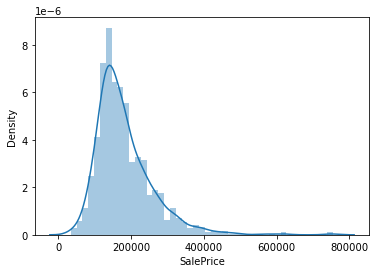

<AxesSubplot:ylabel='Density'>

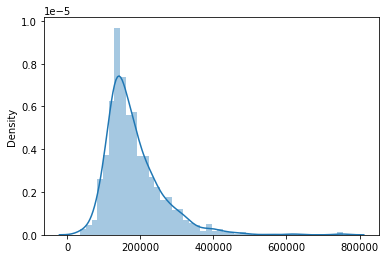

In [246]:
sns.distplot(y)
plt.show()
sns.distplot(pred)

# we can see that the predicted data is very close to actual data

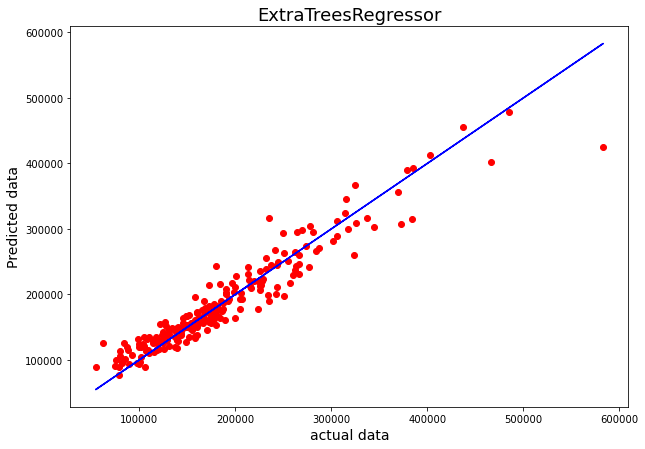

In [242]:
plt.figure(figsize=(10,7))
plt.scatter(x=ytest, y=ypred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

# predicting the values for the test data using our best model

In [454]:
df2=pd.read_csv('housing_test.csv')
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [455]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# we need to fill the nan values in the test data aslo drop id column as it only gives identity to the data

In [456]:
df2=df2.drop(['Id'],axis=1)

In [457]:
#filling nan values of categorical data by mode
lis=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Electrical','Fence','MiscFeature']
for i in lis:
    df2[i]=df2[i].fillna(df2[i].mode().iloc[0])

In [458]:
df2['PoolQC']=df2['PoolQC'].fillna(1)

In [459]:
#filling the non-categorical data by mean
df2['LotFrontage']=df2['LotFrontage'].fillna(round(df2['LotFrontage'].mean()))

In [460]:
print('Dataset contains any null values:',df2.isnull().values.any())

Dataset contains any null values: False


# we have cleared all the nan values now encode the data and check outliers if any remove outliers

In [461]:
#converting all the object type data into numerical so that is will help us in buliding models
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=le.fit_transform(df2[i])

MSSubClass         AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSZoning         AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
                                       ...                        
MiscVal            AxesSubplot(0.322872,0.125;0.0824468x0.0639831)
MoSold             AxesSubplot(0.421809,0.125;0.0824468x0.0639831)
YrSold             AxesSubplot(0.520745,0.125;0.0824468x0.0639831)
SaleType           AxesSubplot(0.619681,0.125;0.0824468x0.0639831)
SaleCondition      AxesSubplot(0.718617,0.125;0.0824468x0.0639831)
Length: 79, dtype: object

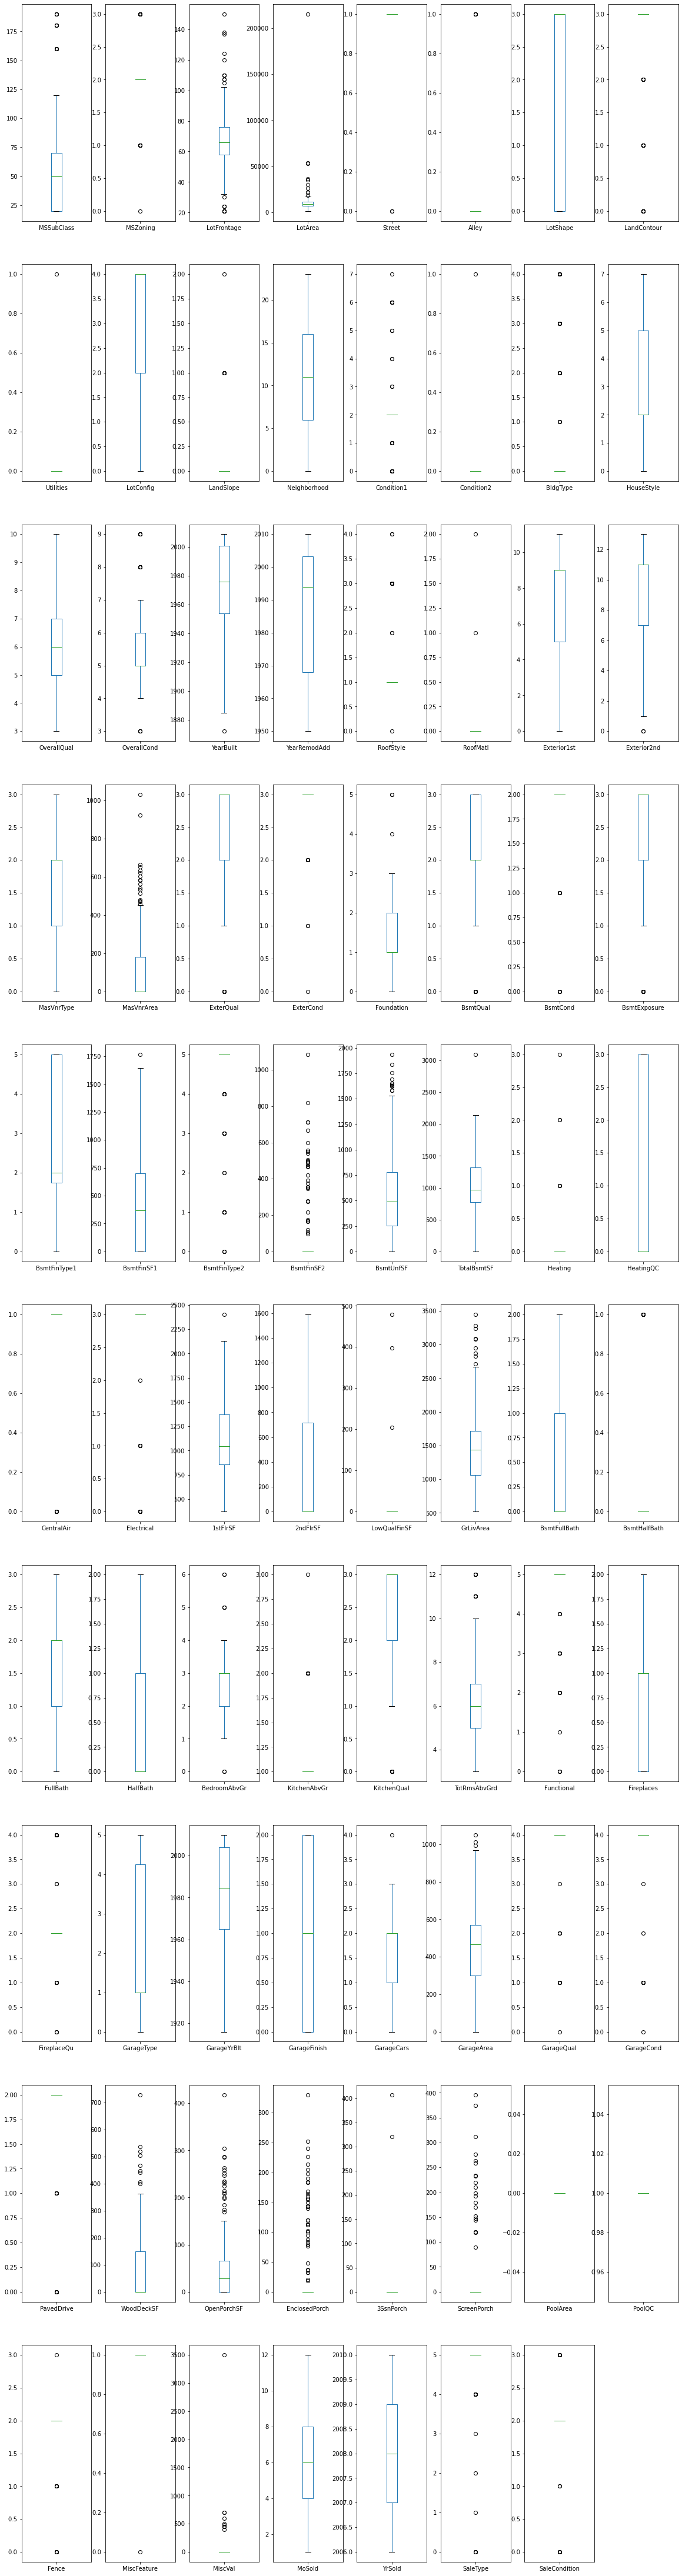

In [462]:
df2.plot(kind='box',subplots=True,layout=(10,8),figsize=(20,80))

In [463]:
for i in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','MiscVal']:
    percentile = df2[i].quantile([0.01,0.98]).values
    df2[i][df2[i]<=percentile[0]]=percentile[0]
    df2[i][df2[i]>=percentile[1]]=percentile[1]

# we have removed the outliers

In [464]:
x=df2

In [465]:
x.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage      -0.006453
LotArea           1.266527
Street          -12.020386
                   ...    
MiscVal           5.159115
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 79, dtype: float64

# removing skewness from non-categorical data

In [466]:
#removing skewness from non-categorical data
df2[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']]=power_transform(df2[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']],method='yeo-johnson')
df2

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            20         2     1.073070  1.012372       1      0         0   
1           120         2    -0.002720 -0.878055       1      0         0   
2            20         2    -0.002720  0.565525       1      0         3   
3            70         2     0.480135  0.598156       1      0         3   
4            60         2     1.073070  1.092887       1      0         0   
..          ...       ...          ...       ...     ...    ...       ...   
287          20         2     0.641557  0.222786       1      0         3   
288          20         2    -0.483245  0.007370       1      0         1   
289          20         2    -0.002720  0.443206       1      0         0   
290          50         3    -0.855156 -1.126366       1      0         3   
291         160         3    -2.372496 -2.329869       1      0         3   

     LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0              1          0          0  ...          0.0         0     1.0   
1              3          0          1  ...          0.0         0     1.0   
2              3          0          4  ...          0.0         0     1.0   
3              0          0          4  ...          0.0         0     1.0   
4              3          0          1  ...          0.0         0     1.0   
..           ...        ...        ...  ...          ...       ...     ...   
287            3          0          4  ...          0.0         0     1.0   
288            3          0          4  ...          0.0         0     1.0   
289            3          0          1  ...          0.0         0     1.0   
290            3          0          0  ...          0.0         0     1.0   
291            3          0          4  ...          0.0         0     1.0   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        2            1      0.0       7    2007         5              2  
1        2            1      0.0       8    2009         0              0  
2        2            1      0.0       6    2009         5              2  
3        2            1      0.0       7    2009         5              2  
4        2            1      0.0       1    2008         5              2  
..     ...          ...      ...     ...     ...       ...            ...  
287      2            1      0.0      10    2008         5              2  
288      2            1      0.0       2    2008         5              2  
289      2            1    455.4       3    2010         5              2  
290      2            1      0.0      10    2006         5              2  
291      2            1      0.0       6    2006         5              2  

[292 rows x 79 columns]

# predicting the data

In [467]:
#predicting the test data using ExtraTrees regressor 
df2['saleprice']=etr.predict(df2)
df2['saleprice']

0      338042.72
1      262362.55
2      297387.63
3      247925.09
4      306689.73
         ...    
287    290547.50
288    240060.32
289    260649.98
290    271039.73
291    226478.10
Name: saleprice, Length: 292, dtype: float64

In [473]:
#saving the predicted values in a csv file
df2.to_csv("housing price",index=False)